AttributeError: module 'matplotlib' has no attribute 'colormaps'

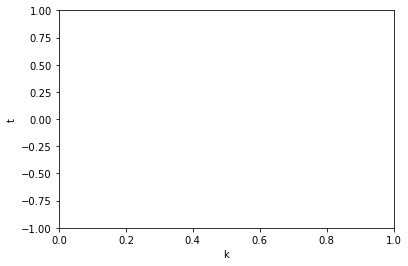

In [5]:
%run basic_strategies.ipynb
%run evolution.ipynb
%run multi_player.ipynb

import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np

def init(N):
    pl = []
    #for i in range(N//6):
        #pl.append(Player(0,0))
        #pl.append(Player(0.25,0))
        #pl.append(Player(0.5,0))
        #pl.append(Player(0.75,0))
        #pl.append(Player(1,0))
        
        #pl.append(Player(0.5,1))
        #pl.append(Player(0.5,-1))
    
    #while len(pl) < N:
        #pl.append(Player(0.5,1))
    
    Nsq=int(N**0.5)
    for i in range(Nsq):
        for j in range(Nsq):
            pl.append(Player(i/Nsq, j*2/Nsq - 1))
    while len(pl) < N:
        pl.append(Player(0.5,0))
    return pl


def repeated(N, it, cyc):
    pl = init(N)
    hist=[]
    scores = round_robin(pl, it)
    for i in range(cyc-1):
        #pl = select(pl, scores)
        pl, k, t=evolve(pl, scores)
        scores = round_robin(pl, it)
        
        hist.append((k,t, scores))
    
    pl,_,_=evolve(pl, scores)#, True)
    scores = round_robin(pl, it)
    
    return pl, hist

def main(N=100, it=100, cyc=100):
    pl, hist = repeated(N, it, cyc)
    fig, ax = plt.subplots()
    ax.set_xlim(0,1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("k")
    ax.set_ylabel("t")
    
    col = 255 * (np.array(hist[0][2]) - min(hist[0][2])) / (max(hist[0][2]) - min(hist[0][2]))
    rgb = mpl.colormaps["coolwarm"](col)[np.newaxis, :, :3][0]
    
    lines=[]
    
    for j in range(len(hist[0][0])):
        line, = ax.plot(hist[0][0][j], hist[0][1][j], c=rgb[j], marker=".", linewidth=0)
        lines.append(line)
    
    #print(lines)
    def animate(i):
        col = 255 * (np.array(hist[i][2]) - min(hist[i][2])) / (max(hist[i][2]) - min(hist[i][2]))
        rgb = mpl.colormaps["coolwarm"](col)[np.newaxis, :, :3][0]
        #print(hist[i][2], col, rgb)
        for j in range(len(lines)):
            lines[j].set_data([hist[i][0][j], hist[i][1][j]])
            lines[j].set_color(rgb[j])
        return lines
    ani = animation.FuncAnimation(fig, animate, interval=500, blit=True, frames=len(hist))
    plt.show()

if __name__ == "__main__":
    main()